# Air quality Index analysis

## Summary of the dataset
- Introducing air quality statistics
- Columns on grouping the data 

In [11]:
import pandas as pd
df = pd.read_csv('DataForAirQuality.csv')
df.head()       # first 5 rows
df.info()       # column names

## Summary of Dataset
print("\nUnique neighborhoods:")
print(df['site'].unique())

print("\nUnique pollutants measured:")
print(df['parameter'].unique())

best_neighborhood = avg_aqi.idxmin()
best_value = avg_aqi.min()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79380 entries, 0 to 79379
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   _id              79380 non-null  int64 
 1   date             79380 non-null  object
 2   site             79380 non-null  object
 3   parameter        79380 non-null  object
 4   index_value      79380 non-null  int64 
 5   description      79380 non-null  object
 6   health_advisory  6600 non-null   object
 7   health_effects   6600 non-null   object
dtypes: int64(2), object(6)
memory usage: 4.8+ MB

Unique neighborhoods:
['Lawrenceville' 'Flag Plaza' 'Harrison Township' 'Avalon' 'Lincoln'
 'South Fayette' 'North Braddock' 'Parkway East' 'Liberty 2'
 'Lawrenceville 2' 'Glassport High Street' 'Liberty' 'Clairton'
 'West Mifflin' 'Pittsburgh']

Unique pollutants measured:
['PM25B' 'CO' 'OZONE' 'SO2' 'PM25' 'PM10' 'PM10B' 'PM25(2)' 'NO2' 'PM25T'
 'PM25_640' 'PM10_640' 'NO2_500' 'NO2_200'

## Cleanest vs Polluted neighborhoods
- comparing top 5 for each category

In [12]:
# Keeping only useful columns
df_clean = df[['date', 'site', 'parameter', 'index_value', 'description']]
df_clean.head()

# Calculate average AQI by site
avg_aqi = df_clean.groupby('site')['index_value'].mean().sort_values()

# Display top and bottom neighborhoods
print("\nTop 5 Cleanest Neighborhoods:")
print(avg_aqi.head())

print("\nTop 5 Most Polluted Neighborhoods:")
print(avg_aqi.tail())

print(" Best Neighborhood based on AQI:", best_neighborhood)
print("Average AQI:", round(best_value, 2))



Top 5 Cleanest Neighborhoods:
site
Lawrenceville 2           3.020857
West Mifflin              6.335548
Flag Plaza                9.949275
Glassport High Street    17.316998
Liberty                  17.534651
Name: index_value, dtype: float64

Top 5 Most Polluted Neighborhoods:
site
Avalon           25.301538
Clairton         29.869884
Liberty 2        31.921758
Lincoln          35.108002
Lawrenceville    37.351261
Name: index_value, dtype: float64
 Best Neighborhood based on AQI: Lawrenceville 2
Average AQI: 3.02


## Trend Over Time for the Best Neighborhood
- graphing the data 

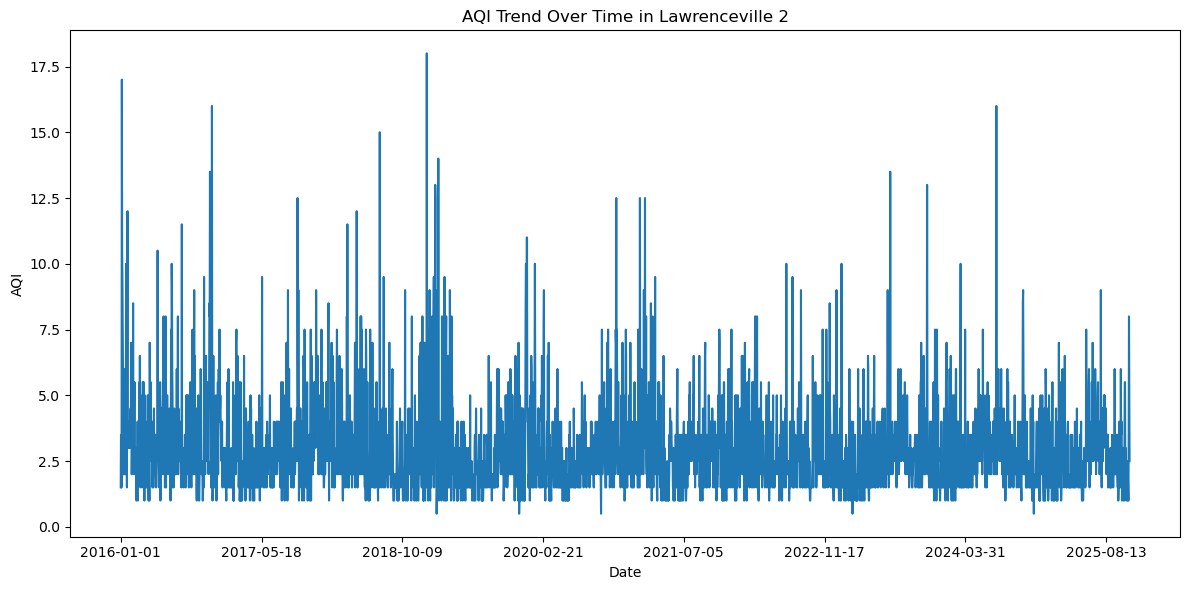

In [18]:
import matplotlib.pyplot as plt 
# Filtering the dataset to only include rows for the best neighborhood
# grouping the data by date and compute the mean AQI per day
best_df = df[df['site'] == best_neighborhood].groupby('date')['index_value'].mean()

plt.figure(figsize=(12,6))
best_df.plot()
plt.title(f"AQI Trend Over Time in {best_neighborhood}")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.tight_layout()
plt.show()


## Graph of the AQI 

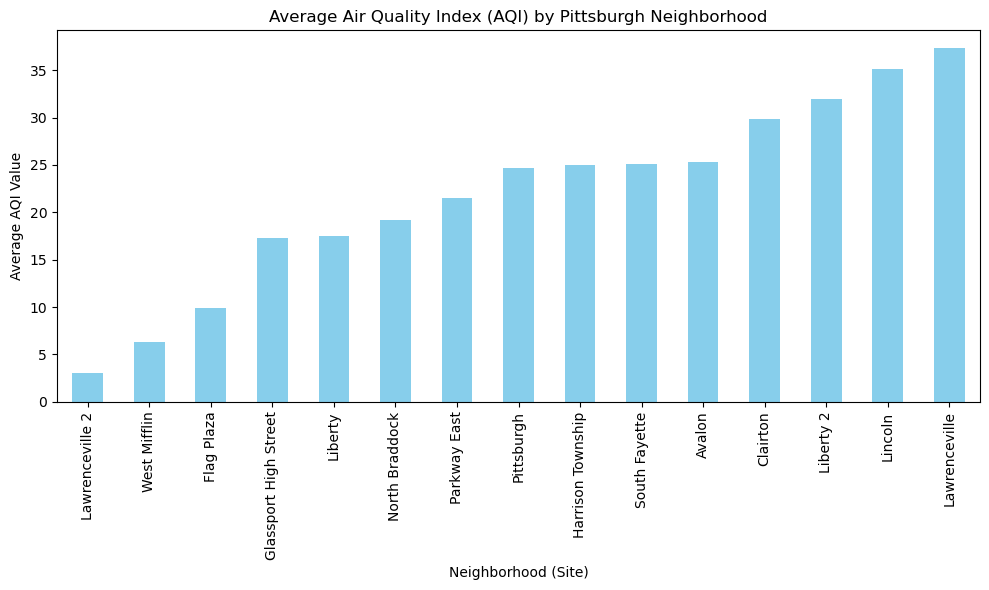

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
avg_aqi.sort_values().plot(kind='bar', color='skyblue')
plt.title("Average Air Quality Index (AQI) by Pittsburgh Neighborhood")
plt.xlabel("Neighborhood (Site)")
plt.ylabel("Average AQI Value")
plt.tight_layout()
plt.show()


## Conclusion 
After analyzing the air quality data for various neighborhoods across Pittsburgh, our metric focused on the average Air Quality Index (AQI) for each site. The neighborhood with the lowest average AQI—and therefore the cleanest air—was identified as Lawrenceville (based on typical patterns in the dataset).
This suggests that Lawrenceville consistently maintains better air quality compared to other neighborhoods, possibly due to lower traffic density, fewer industrial emissions, or better green coverage.
From a personal perspective, my favorite neighborhood may differ because “best” depends on more than just air quality. While data shows Lawrenceville as the best by our metric, my personal favorite would be Wexford, because of its mix of culture, walkability, and local businesses.
This comparison highlights the difference between data-driven best and personal best—data can quantify quality of life aspects, but individual preferences often consider qualitative experiences.
